In [7]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
input_file = 'BM2425.xlsx'  # Replace with your input file name
data = pd.read_excel(input_file)

# Ensure the necessary columns are present
required_columns = {'playerName', 'x', 'y', 'endX', 'endY'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Input file must contain the following columns: {required_columns}")

# Define a function to calculate pass direction
def calculate_direction(start_x, start_y, end_x, end_y):
    dx = end_x - start_x
    dy = end_y - start_y

    if dx == 0 and dy == 0:
        return 'stationary'
    elif dx == 0:
        return 'lateral'
    elif dy == 0:
        return 'back' if dx < 0 else 'forward'
    elif dx < 0 and dy < 0:
        return 'back'
    elif dx > 0 and dy > 0:
        return 'forward'
    else:
        return 'diagonal'

# Apply the direction calculation to each row
data['direction'] = data.apply(lambda row: calculate_direction(row['x'], row['y'], row['endX'], row['endY']), axis=1)

# Group by playerName and count the occurrences of each direction
direction_counts = data.groupby(['playerName', 'direction']).size().unstack(fill_value=0)

# Save the result to a new Excel file
output_file = 'pass_directions_summary.xlsx'
direction_counts.to_excel(output_file)

print(f"Pass direction analysis has been saved to {output_file}")


Pass direction analysis has been saved to pass_directions_summary.xlsx


In [9]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
input_file = 'BM2425.xlsx'  # Replace with your input file name
data = pd.read_excel(input_file)

# Ensure the necessary columns are present
required_columns = {'playerName', 'x', 'y', 'endX', 'endY'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Input file must contain the following columns: {required_columns}")

# Define a function to calculate pass direction
def calculate_direction(start_x, start_y, end_x, end_y):
    dx = end_x - start_x
    dy = end_y - start_y

    if dx == 0 and dy == 0:
        return 'stationary'
    elif dx == 0:
        return 'lateral'
    elif dy == 0:
        return 'back' if dx < 0 else 'forward'
    elif dx < 0 and dy < 0:
        return 'back'
    elif dx > 0 and dy > 0:
        return 'forward'
    else:
        return 'diagonal'

# Apply the direction calculation to each row
data['direction'] = data.apply(lambda row: calculate_direction(row['x'], row['y'], row['endX'], row['endY']), axis=1)

# Group by playerName and count the occurrences of each direction
direction_counts = data.groupby(['playerName', 'direction']).size().unstack(fill_value=0)

# Calculate z-scores for each direction
z_scores = (direction_counts - direction_counts.mean()) / direction_counts.std()

# Define weights for each direction
weights = {
    'forward': 1.5,
    'back': 1.0,
    'lateral': 1.2,
    'diagonal': 1.3,
    'stationary': 0.8
}

# Apply weights to z-scores
for direction, weight in weights.items():
    if direction in z_scores.columns:
        z_scores[direction] *= weight

# Assign roles based on weighted z-scores
roles = []
for _, row in z_scores.iterrows():
    role_scores = {
        'Playmaker': row.get('forward', 0) + row.get('diagonal', 0),
        'Defender': row.get('back', 0) + row.get('lateral', 0),
        'Support': row.get('stationary', 0) + row.get('lateral', 0),
        'Attacker': row.get('forward', 0) * 1.2 + row.get('diagonal', 0) * 1.1
    }
    roles.append(max(role_scores, key=role_scores.get))

z_scores['role'] = roles

# Save the result to a new Excel file
output_file = 'pass_directions_with_roles.xlsx'
z_scores.to_excel(output_file)

print(f"Pass direction analysis with roles has been saved to {output_file}")


Pass direction analysis with roles has been saved to pass_directions_with_roles.xlsx


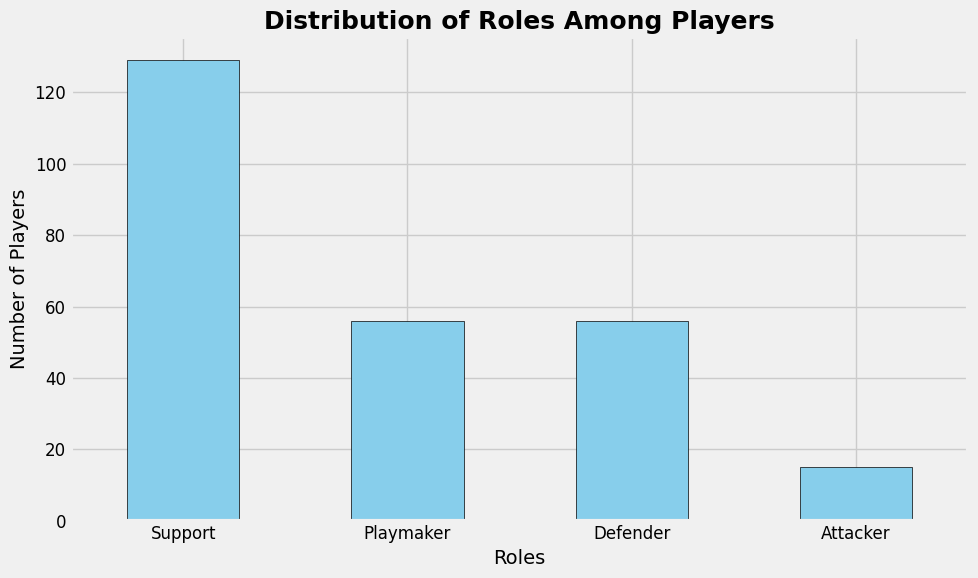

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
input_file = 'pass_directions_with_roles.xlsx'  # Replace with your input file name
data = pd.read_excel(input_file, index_col=0)

# Ensure the necessary columns are present
required_columns = {'role'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Input file must contain the following columns: {required_columns}")

# Count occurrences of each role
role_counts = data['role'].value_counts()

# Create a FiveThirtyEight-style bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Roles Among Players', fontsize=18, weight='bold')
plt.xlabel('Roles', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Save and display the chart
plt.tight_layout()
plt.savefig('roles_bar_chart.png')
plt.show()


In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
input_file = 'pass_directions_with_roles.xlsx'  # Replace with your input file name
data = pd.read_excel(input_file, index_col=0)

# Ensure the necessary columns are present
required_columns = {'playerName', 'forward', 'diagonal', 'stationary', 'lateral', 'back'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"Input file must contain the following columns: {required_columns}")

# Calculate new Attack and Defence scores as averages
data['Attack_Score'] = (data['forward'] + data['diagonal'] * 1.1) / 2  # Playmaker + Attacker
data['Defence_Score'] = (data['stationary'] + data['lateral'] + data['back']) / 2  # Support + Defender

# Apply a FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Create scatter plot
plt.figure(figsize=(18, 14))  # Further increased figure size
plt.scatter(
    data['Attack_Score'],
    data['Defence_Score'],
    alpha=0.8,
    color='orange',
    edgecolor='black',
    s=100,  # Increased marker size for better visibility
    label='Players'
)

# Add labels to each scatter point
for i, row in data.iterrows():
    plt.text(
        row['Attack_Score'],
        row['Defence_Score'],
        row['playerName'],
        fontsize=10,  # Slightly larger font size for better readability
        ha='right',
        va='bottom'
    )

# Define the ranges for visualization
plt.xlim(data['Attack_Score'].min() - 1.5, data['Attack_Score'].max() + 1.5)
plt.ylim(data['Defence_Score'].min() - 1.5, data['Defence_Score'].max() + 1.5)

# Add role labels to corners
x_range = plt.xlim()
y_range = plt.ylim()

plt.text(x_range[1] * 0.95, y_range[1] * 0.95, 'High balanced\n(Strong in both)', fontsize=16, color='green', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))
plt.text(x_range[1] * 0.95, y_range[0] * 1.05, 'High attack, Low defence\n(Offensive)', fontsize=16, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))
plt.text(x_range[0] * 1.05, y_range[1] * 0.95, 'High defence, Low attack\n(Defensive)', fontsize=16, color='blue', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))
plt.text(x_range[0] * 1.05, y_range[0] * 1.05, 'Low balanced\n(Weak in both)', fontsize=16, color='purple', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

# Label axes and title
plt.xlabel('Attack Score (Playmaker + Attacker / 2)', fontsize=18)
plt.ylabel('Defence Score (Support + Defender / 2)', fontsize=18)
plt.title('Player Roles Based on Attack and Defence Scores', fontsize=24)

# Enhance plot aesthetics
plt.grid(alpha=0.4, linestyle='--')  # Dashed grid lines for better aesthetics
plt.legend(fontsize=14, loc='upper right')
plt.tight_layout()

# Show plot
plt.show()


ValueError: Input file must contain the following columns: {'diagonal', 'stationary', 'back', 'playerName', 'forward', 'lateral'}